In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import seaborn as sns

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Q1 Read in data

In [2]:
# Reading the gold label text file
gold_df = pd.read_csv('gold.txt',
                      sep='\t',      # use this field separator
                      header=None,   # do not use the first line as a header
                      names=['url', 'category'])
label_df = pd.read_csv('labels.txt',
                      sep='\t',      # use this field separator
                      header=None,   # do not use the first line as a header
                      names=['turk','url', 'category'])
print("Shape before dropping duplicates labels_df :",label_df.shape)
print("Shape before dropping duplicates for gold_df :",gold_df.shape)

#label_df = label_df.drop_duplicates()
#gold_df = gold_df.drop_duplicates()

print("Shape after dropping duplicates labels_df :",label_df.shape)
print("Shape after dropping duplicates for gold_df :",gold_df.shape)

Shape before dropping duplicates labels_df : (92721, 3)
Shape before dropping duplicates for gold_df : (1517, 2)
Shape after dropping duplicates labels_df : (92721, 3)
Shape after dropping duplicates for gold_df : (1517, 2)


In [3]:
label_df.head()

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G


In [4]:
gold_df.head()

,url,category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X


## Q2 Split into two DataFrames

In [5]:
labels_gold = label_df[label_df['url'].isin(gold_df['url'])] #used isin to find out the url that are in gold_df
labels_unknown = label_df[~label_df['url'].isin(gold_df['url'])] #just negated the above output to get the url's that not in gold_df 

In [6]:
print(labels_gold.shape)
print(labels_unknown.shape)

(3324, 3)
(89397, 3)


## Q3 Compute accuracies of turks

In [7]:
temp_df = labels_gold.merge(gold_df,on = 'url',suffixes = ['_turk','_gold'])
temp_df['flag'] =  temp_df.apply(lambda row: 1 if row['category_turk'] == row['category_gold'] else 0,axis = 1)
temp_df
temp_df2 = temp_df.groupby(['turk'])['flag'].agg(['count','mean']).reset_index()
temp_df2
temp_df2['count'].sum()

3324

In [8]:
rater_goodness = temp_df2.rename(columns = {'count':'number_of_ratings','mean':'avg_correctness'}).set_index('turk')
rater_goodness.head(10)

,number_of_ratings,avg_correctness
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
A13CEW9JGDWGX1,1,1.000000
A13OE9GBRJ0S2U,4,0.750000
A14IQ4GLNWNPOJ,1,1.000000
A153PKAL7OAY36,148,0.722973


## Q4 Odds ratios


In [9]:
rater_goodness['odds'] = rater_goodness['avg_correctness'].apply(lambda x : x/(1.001-x))
rater_goodness.head(10)

,number_of_ratings,avg_correctness,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
A13CEW9JGDWGX1,1,1.000000,1000.000000
A13OE9GBRJ0S2U,4,0.750000,2.988048
A14IQ4GLNWNPOJ,1,1.000000,1000.000000
A153PKAL7OAY36,148,0.722973,2.600369


## Q5 Most accurate turks

In [10]:
rater_goodness[rater_goodness['number_of_ratings'] >= 20].sort_values(by = 'avg_correctness',ascending = False)[:10]

,number_of_ratings,avg_correctness,odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


## Q6 Rating counts versus accuracy
#### Is number of ratings by a turker on gold set URLs related to his or her accuracy? There’s no fixed answer; just try to show some evidence for your answer.
- We can see that there is higher accuracy among turks with fewer ratings.In addition to that, accuracy  does not go down with increase in ratings as expected earlier
- Also, there is no visible linear relationship hence pearson correlation might not wo
- The correlation of 0.04 is not significant

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'average_correctness')

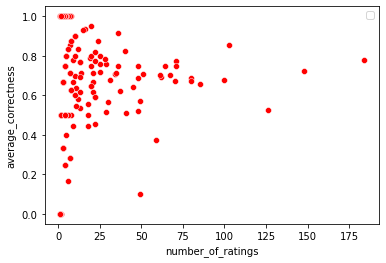

In [11]:
ax = sns.scatterplot(x="number_of_ratings", y="avg_correctness", data=rater_goodness,color='red')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
ax.set_ylabel("average_correctness")

In [12]:
rater_goodness['number_of_ratings'].corr(rater_goodness['avg_correctness'])

0.04529238280484696

## Q7 Overall predicted odds


In [13]:
# Identifying the turks based on the 75 percentile range
turks_75 = rater_goodness[rater_goodness['number_of_ratings'] >= rater_goodness['number_of_ratings'].quantile(0.75)]
turks_25 = rater_goodness[rater_goodness['number_of_ratings'] >= rater_goodness['number_of_ratings'].quantile(0.25)]
turks_75

,number_of_ratings,avg_correctness,odds
turk,,,
A1253FXHCZ9CWM,29,0.517241,1.069214
A12RE8G66WTO8B,20,0.750000,2.988048
A153PKAL7OAY36,148,0.722973,2.600369
A18HIFA78GUAG9,13,0.538462,1.164144
A1DCIXV1JC91MY,22,0.590909,1.440922
...,...,...,...
AV30XWLULCP43,13,0.615385,1.595851
AVWJPWUEE3U4Q,36,0.750000,2.988048
AZ1S5BIG5R6P6,35,0.714286,2.491281


In [14]:
temp_df = pd.merge(labels_unknown, turks_75,  how='inner', left_on=['turk'], right_on = [turks_75.index])
temp_df

,turk,url,category,number_of_ratings,avg_correctness,odds
0,A1PXXEOGQ76RNJ,http://000.cc,G,41,0.512195,1.047852
1,A1PXXEOGQ76RNJ,http://000.cc,G,41,0.512195,1.047852
2,A1PXXEOGQ76RNJ,http://0000.jp,G,41,0.512195,1.047852
3,A1PXXEOGQ76RNJ,http://000relationships.com,G,41,0.512195,1.047852
4,A1PXXEOGQ76RNJ,http://000relationships.com,G,41,0.512195,1.047852
...,...,...,...,...,...,...
41642,amurray,http://www.blazzpage.7p.com/,G,15,0.933333,13.793103
41643,amurray,http://www.byroncrawford.com/,P,15,0.933333,13.793103
41644,amurray,http://www.freelayouticons.com/,P,15,0.933333,13.793103
41645,amurray,http://www.hollywoodtuna.com/?p=4729,R,15,0.933333,13.793103


In [15]:
overall_odds = temp_df.groupby(['url','category']).agg({'odds':'prod'}).reset_index()
overall_odds.rename(columns={'odds': 'overall_odds'}, inplace=True)
overall_odds = overall_odds.sort_values(by = ['url','overall_odds'], ascending = [True, False])
overall_odds

,url,category,overall_odds
0,http://0-101.net,G,2.155963
1,http://000.cc,G,1.460583
2,http://0000.jp,G,14.488244
3,http://000relationships.com,G,9.914590
4,http://000relationships.com,P,1.851852
...,...,...,...
14109,http://zynga.com,G,3.704611
14111,http://zz868.com,P,1.851852
14110,http://zz868.com,G,1.047852
14113,http://zzx.cc,X,1.620746


## Q8 Predicted categories

In [16]:
result_75 = overall_odds.groupby('url').first()
result_75.rename(columns={'category': 'top_category', 'overall_odds': 'top_odds'}, inplace=True)
result_75

,top_category,top_odds
url,,
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,9.914590
http://000vitamins.com,G,3.784982
...,...,...
http://zwinky.com,G,16.141443
http://zylom.com,G,1.735526
http://zynga.com,G,3.704611


In [17]:
result_75.loc['http://fisherbikes.com']

top_category               G
top_odds        59084.832547
Name: http://fisherbikes.com, dtype: object

## Q9 Predicted categories using more turks

In [18]:
temp_df = pd.merge(labels_unknown, turks_25,  how='inner', left_on=['turk'], right_on = [turks_25.index])
temp_df

,turk,url,category,number_of_ratings,avg_correctness,odds
0,A1OT3A29R9N1DG,http://000.cc,P,8,0.500000,0.998004
1,A1OT3A29R9N1DG,http://1centemails.com,G,8,0.500000,0.998004
2,A1OT3A29R9N1DG,http://24hfx.com,P,8,0.500000,0.998004
3,A1OT3A29R9N1DG,http://265e.com,P,8,0.500000,0.998004
4,A1OT3A29R9N1DG,http://30gh.com,G,8,0.500000,0.998004
...,...,...,...,...,...,...
74974,A1AI3MUH2BW1DN,http://orientalement.com,G,1,0.000000,0.000000
74975,A1AI3MUH2BW1DN,http://thesite.org,G,1,0.000000,0.000000
74976,A1AI3MUH2BW1DN,http://wickedtemptations.com,P,1,0.000000,0.000000
74977,A2MC38IV7L231H,http://realsocialdynamics.com,P,3,0.333333,0.499251


In [19]:
overall_odds_25 = temp_df.groupby(['url','category']).agg({'odds':'prod'}).reset_index()
overall_odds_25.rename(columns={'odds': 'overall_odds'}, inplace=True)
overall_odds_25 = overall_odds_25.sort_values(by = ['url','overall_odds'], ascending = [True, False])

result_25 = overall_odds_25.groupby('url').first()
result_25.rename(columns={'category': 'top_category', 'overall_odds': 'top_odds'}, inplace=True)
result_25

,top_category,top_odds
url,,
http://0-101.net,G,2.155963e+00
http://000.cc,G,2.181050e+03
http://0000.jp,G,2.877556e+07
http://000relationships.com,P,1.851852e+00
http://000vitamins.com,G,5.014149e+03
...,...,...
http://zwinky.com,P,1.000000e+03
http://zylom.com,G,2.873345e+06
http://zynga.com,G,5.442125e+01


In [20]:
combined = pd.merge(result_75, result_25, how='inner', left_on=[result_75.index], right_on = [result_25.index])
combined

,key_0,top_category_x,top_odds_x,top_category_y,top_odds_y
0,http://0-101.net,G,2.155963,G,2.155963e+00
1,http://000.cc,G,1.460583,G,2.181050e+03
2,http://0000.jp,G,14.488244,G,2.877556e+07
3,http://000relationships.com,G,9.914590,P,1.851852e+00
4,http://000vitamins.com,G,3.784982,G,5.014149e+03
...,...,...,...,...,...
10605,http://zwinky.com,G,16.141443,P,1.000000e+03
10606,http://zylom.com,G,1.735526,G,2.873345e+06
10607,http://zynga.com,G,3.704611,G,5.442125e+01
10608,http://zz868.com,P,1.851852,G,1.209566e+16


In [21]:
comparison = pd.crosstab(combined['top_category_x'], combined['top_category_y'],normalize='index')
comparison

top_category_y,G,P,R,X
top_category_x,,,,
G,0.853490,0.090193,0.030748,0.025569
P,0.391753,0.453608,0.111684,0.042955
R,0.103286,0.169014,0.563380,0.164319
X,0.128205,0.021978,0.064103,0.785714
